In [ ]:
#Importamos las librerias que ocuparemos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rub_f as r #La importe ya que quise empezar a probarla ya en situaciones reales

In [ ]:
#Pasamos a DataFrames los archivos csv
df_pais = r.cargar_dataset('Boston_United States_limpio.csv')

In [ ]:
#Pasamos a DataFrames los archivos csv
df_Mexico = r.cargar_dataset('Mexico.csv')

In [ ]:
#Limpiamos el DataFrame con una de mis funciones
df_Mexico = r.vn_promedio(df_Mexico)

/Users/borregof/Desktop/Profe_Freddy/Tarea_valores atípicos/rub_f.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cual = col_cual.fillna(method='ffill')


In [ ]:
#Verificamos que ya esté limpio
r.val_nu(df_Mexico)

('Valores nulos por columna:',
 id                                    0
 host_id                               0
 neighbourhood_group               26281
 latitude                              0
 longitude                             0
 price                                 0
 minimum_nights                        0
 number_of_reviews                     0
 reviews_per_month                     0
 calculated_host_listings_count        0
 availability_365                      0
 number_of_reviews_ltm                 0
 license                           26281
 name                                  0
 host_name                             0
 neighbourhood                         0
 room_type                             0
 last_review                           0
 dtype: int64,
 'Valores nulos en total:',
 np.int64(52562))

In [ ]:
#Averiguamos el tipo de datos que tenemos para poder empezar a separalos
df_Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26281 non-null  int64  
 1   host_id                         26281 non-null  int64  
 2   neighbourhood_group             0 non-null      float64
 3   latitude                        26281 non-null  float64
 4   longitude                       26281 non-null  float64
 5   price                           26281 non-null  float64
 6   minimum_nights                  26281 non-null  int64  
 7   number_of_reviews               26281 non-null  int64  
 8   reviews_per_month               26281 non-null  float64
 9   calculated_host_listings_count  26281 non-null  int64  
 10  availability_365                26281 non-null  int64  
 11  number_of_reviews_ltm           26281 non-null  int64  
 12  license                         

In [ ]:
#Dividimos los datos en dos tipos: cuantitativas y cualitativas
cuant_Mex = df_Mexico.iloc[ : , 0:12 ]
cual_Mex = df_Mexico.iloc[ : ,13:17]

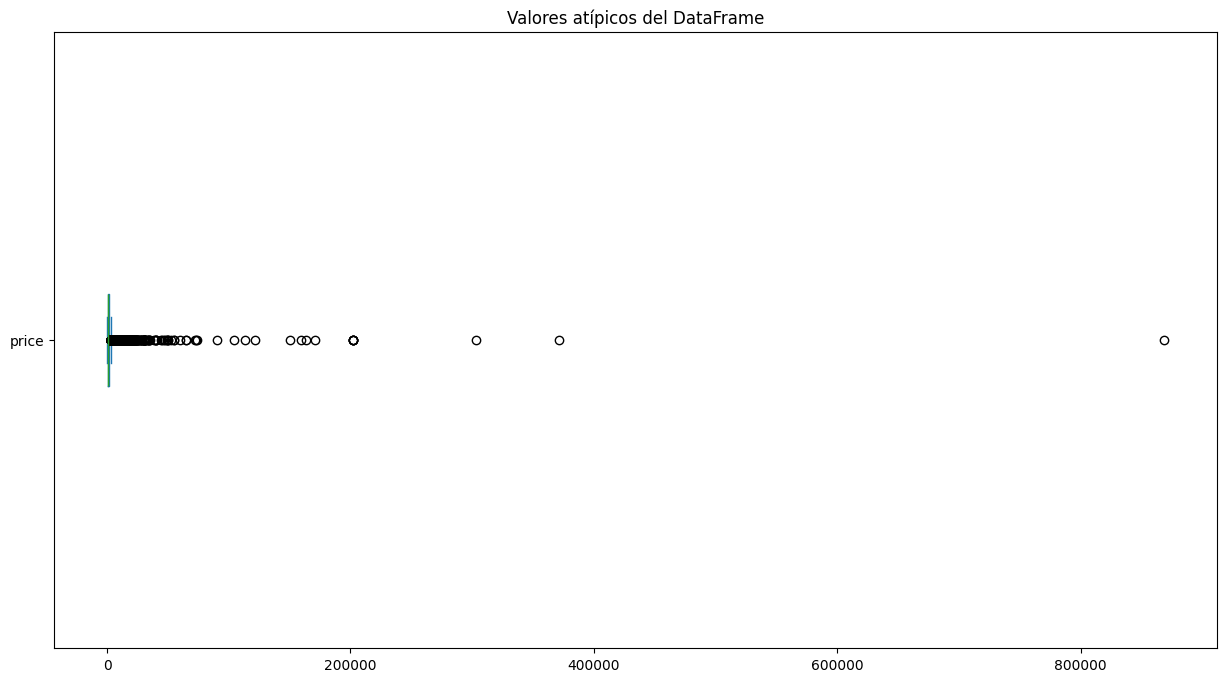

In [ ]:
#Graficamos una de las variables para poder hacer una comparativa antes y despues de la limpieza de atipicos
fig = plt.figure(figsize=(15,8))
cuant_Mex['price'].plot(kind='box', vert=False)
plt.title('Valores atípicos del DataFrame')
plt.show()

In [ ]:
#Averiguamos el tipo de datos que tenemos para poder empezar a separalos
df_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4426 entries, 0 to 4425
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4426 non-null   int64  
 1   host_listings_count          4426 non-null   int64  
 2   host_total_listings_count    4426 non-null   int64  
 3   latitude                     4426 non-null   float64
 4   longitude                    4426 non-null   float64
 5   accommodates                 4426 non-null   int64  
 6   bathrooms                    4426 non-null   float64
 7   bedrooms                     4426 non-null   float64
 8   beds                         4426 non-null   float64
 9   minimum_nights               4426 non-null   int64  
 10  maximum_nights               4426 non-null   int64  
 11  minimum_minimum_nights       4426 non-null   float64
 12  maximum_minimum_nights       4426 non-null   float64
 13  minimum_maximum_ni

In [ ]:
#Dividimos los datos en dos tipos: cuantitativas y cualitativas
cuant_pais = df_pais.iloc[ : ,1:28]
cual_pais = df_pais.iloc[ : ,29:48]

In [ ]:
y_m = cuant_Mex #Guardamos en una variable los datos cuantitativos

per25 = y_m.quantile(0.25) #Encontramos el Q1
per75 = y_m.quantile(0.75) #Encontramos el Q2

iqr = per75 - per25  #Calculamos el rango intercuartílico

#Calculamos ambos limites
Limite_Superior_M = per75 + 1.5*iqr  
Limite_Inferior_M = per25 - 1.5*iqr

Limite_Superior_M

id                                2.600145e+18
host_id                           8.860262e+08
neighbourhood_group                        NaN
latitude                          1.949298e+01
longitude                        -9.911830e+01
price                             3.126500e+03
minimum_nights                    3.500000e+00
number_of_reviews                 1.480000e+02
reviews_per_month                 4.950000e+00
calculated_host_listings_count    2.600000e+01
availability_365                  7.390000e+02
number_of_reviews_ltm             5.500000e+01
dtype: float64

In [ ]:
#Eliminamos los outliers con una delimitación de los limites que encontramos
data3 = cuant_Mex[(y_m<=Limite_Superior_M) & (y_m>=Limite_Inferior_M)]
data3

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,499553,1297488,NaN,19.436210,-99.138740,NaN,3.0,26.0,0.17,2.0,117,1.0
1,501037,1364145,NaN,19.415780,-99.174250,1150.0,NaN,134.0,0.89,2.0,232,23.0
2,517503,2547499,NaN,19.437840,NaN,550.0,1.0,NaN,3.43,1.0,339,52.0
3,527473,158585,NaN,19.418870,-99.173330,NaN,1.0,NaN,2.35,1.0,216,32.0
4,544105,2674950,NaN,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,369403303,NaN,19.436998,-99.196733,760.0,1.0,0.0,1.20,12.0,363,0.0
26277,1318960023050066631,525554527,NaN,19.449230,-99.136170,NaN,1.0,0.0,1.20,1.0,365,0.0
26278,1318997244771691320,293574406,NaN,NaN,NaN,227.0,3.0,0.0,1.20,8.0,365,0.0
26279,1319078571963617776,35255741,NaN,19.400096,-99.172981,3125.0,1.0,0.0,1.20,NaN,359,0.0


In [ ]:
#Verificamos la existencia de nulos
data3.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group               26281
latitude                           1812
longitude                          2843
price                              2486
minimum_nights                     3523
number_of_reviews                  2177
reviews_per_month                  1332
calculated_host_listings_count     3380
availability_365                      0
number_of_reviews_ltm              1207
dtype: int64

In [ ]:
#Rellenamos los nulos creando un nuevo Data Frame
data4 = data3.copy()
data4 = data4.fillna(round(data3.mean(),1))
data4

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,499553,1297488,NaN,19.436210,-99.138740,1153.4,3.0,26.0,0.17,2.0,117,1.0
1,501037,1364145,NaN,19.415780,-99.174250,1150.0,1.6,134.0,0.89,2.0,232,23.0
2,517503,2547499,NaN,19.437840,-99.200000,550.0,1.0,30.1,3.43,1.0,339,52.0
3,527473,158585,NaN,19.418870,-99.173330,1153.4,1.0,30.1,2.35,1.0,216,32.0
4,544105,2674950,NaN,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,369403303,NaN,19.436998,-99.196733,760.0,1.0,0.0,1.20,12.0,363,0.0
26277,1318960023050066631,525554527,NaN,19.449230,-99.136170,1153.4,1.0,0.0,1.20,1.0,365,0.0
26278,1318997244771691320,293574406,NaN,19.400000,-99.200000,227.0,3.0,0.0,1.20,8.0,365,0.0
26279,1319078571963617776,35255741,NaN,19.400096,-99.172981,3125.0,1.0,0.0,1.20,5.0,359,0.0


In [ ]:
#Y finalmente concatenamos el nuevo DataFrame libre de atipicos y lel DataFrame donde almacenamos las cualitativas
df_Mexico_limpio = pd.concat([cual_Mex, data4], axis=1)
df_Mexico_limpio

,name,host_name,neighbourhood,room_type,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,"Deluxe 4-BR penthouse, views, historic center",Petra,Cuauhtémoc,Entire home/apt,499553,1297488,NaN,19.436210,-99.138740,1153.4,3.0,26.0,0.17,2.0,117,1.0
1,The best cheap flat in La Condesa!!,Humberto,Cuauhtémoc,Entire home/apt,501037,1364145,NaN,19.415780,-99.174250,1150.0,1.6,134.0,0.89,2.0,232,23.0
2,Nice big room near airport,Irma Adriana,Venustiano Carranza,Private room,517503,2547499,NaN,19.437840,-99.200000,550.0,1.0,30.1,3.43,1.0,339,52.0
3,"Nuestro bello departamento, un paraíso en la C...",Fernando,Cuauhtémoc,Entire home/apt,527473,158585,NaN,19.418870,-99.173330,1153.4,1.0,30.1,2.35,1.0,216,32.0
4,Polanco great location! Priv Room in Shared Apart,Elizabeth,Miguel Hidalgo,Private room,544105,2674950,NaN,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,Suite Dumas Polanco 8D,Grissell,Miguel Hidalgo,Private room,1318906185008171760,369403303,NaN,19.436998,-99.196733,760.0,1.0,0.0,1.20,12.0,363,0.0
26277,Departamento amueblado en CDMX,Partner,Cuauhtémoc,Entire home/apt,1318960023050066631,525554527,NaN,19.449230,-99.136170,1153.4,1.0,0.0,1.20,1.0,365,0.0
26278,hospedaje en Coyoacán CDMX,Bellanira Isabel,Coyoacán,Shared room,1318997244771691320,293574406,NaN,19.400000,-99.200000,227.0,3.0,0.0,1.20,8.0,365,0.0
26279,3 recámaras 3 baños con estacionamiento,Juan,Miguel Hidalgo,Entire home/apt,1319078571963617776,35255741,NaN,19.400096,-99.172981,3125.0,1.0,0.0,1.20,5.0,359,0.0


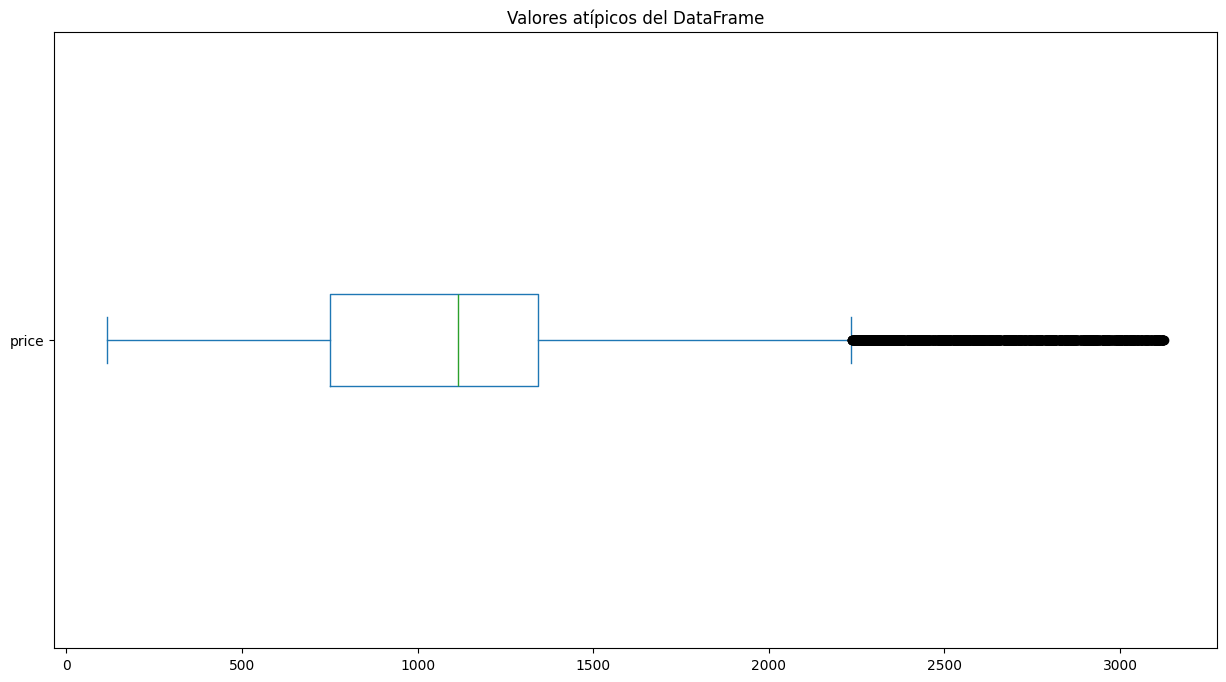

In [ ]:
#Creamos un diagrama de bigote para poder comparalo con el del inicio y comprobar si es que lo hicimos bien (aún dudo de si lo hice bien  :( )
fig = plt.figure(figsize=(15,8))
df_Mexico_limpio['price'].plot(kind='box', vert=False)
plt.title('Valores atípicos del DataFrame')
plt.show()

<Figure size 1500x800 with 0 Axes>

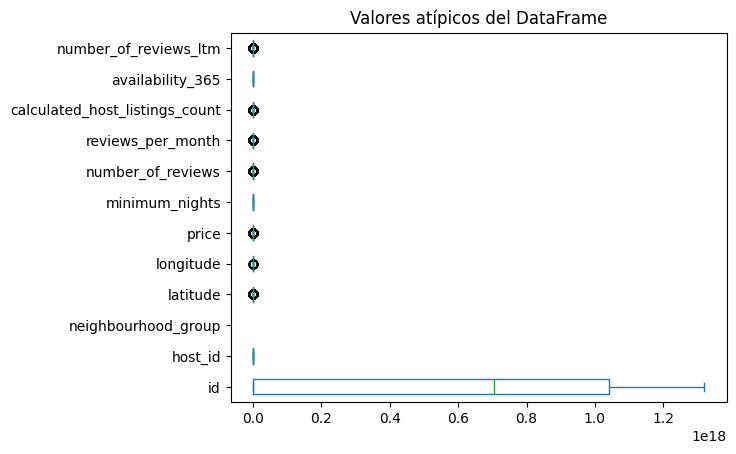

In [ ]:
#Y finalmente hacemos uno global para poder ver los outliers existentes
fig = plt.figure(figsize=(15,8))
df_Mexico_limpio.plot(kind='box', vert=False)
plt.title('Valores atípicos del DataFrame')
plt.show()

## Realmente aquí repetimos los pasos así que solo lo único que cambia es el DataFrame con el que trabajamos

In [66]:
y_p = cuant_pais


per25p = y_p.quantile(0.25) #Q1
per75p = y_p.quantile(0.75) #Q1

iqr_p = per75p - per25p

Limite_Superior_P = per75p + 1.5*iqr_p
Limite_Inferior_P = per25p - 1.5*iqr_p

Limite_Superior_P

host_listings_count             202.000000
host_total_listings_count       323.000000
latitude                         42.402792
longitude                       -71.001550
accommodates                      7.000000
bathrooms                         1.000000
bedrooms                          3.500000
beds                              3.500000
minimum_nights                   78.500000
maximum_nights                 2265.000000
minimum_minimum_nights           76.000000
maximum_minimum_nights           75.500000
minimum_maximum_nights         2265.000000
maximum_maximum_nights         2265.000000
minimum_nights_avg_ntm           77.000000
maximum_nights_avg_ntm         2265.000000
availability_30                  70.000000
availability_60                 133.125000
availability_90                 192.000000
number_of_reviews               141.000000
number_of_reviews_ltm            45.000000
number_of_reviews_l30d            2.500000
review_scores_rating              5.260000
review_scor

In [65]:
print(y_p.shape, Limite_Superior_P.shape, Limite_Inferior_P.shape)

(4426, 27) (27,) (34,)


In [68]:
data3_p = cuant_pais[(y_p<=Limite_Superior_P) & (y_p>=Limite_Inferior_P)]
data3_p

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_location
0,2.0,6.0,42.364130,-71.029910,2.0,1.0,1.0,1.0,29.0,1125,...,0,17,26.0,1.0,0.0,4.96,5.00,5.00,4.96,4.85
1,11.0,14.0,42.328440,-71.095810,2.0,1.0,1.0,1.0,3.0,90,...,50,80,132.0,10.0,0.0,4.81,4.88,4.95,4.89,4.56
2,11.0,14.0,42.328020,-71.093870,4.0,1.0,0.0,2.0,3.0,730,...,52,82,135.0,8.0,0.0,4.81,4.83,4.91,4.95,4.53
3,8.0,32.0,42.358670,-71.063070,2.0,1.0,1.0,2.0,NaN,365,...,0,0,29.0,1.0,0.0,4.69,4.69,4.93,4.97,4.97
4,22.0,29.0,42.351730,-71.086850,3.0,1.0,0.0,1.0,NaN,1125,...,59,89,9.0,0.0,0.0,NaN,NaN,NaN,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,199.0,NaN,42.359190,-71.067150,1.0,1.0,1.0,1.0,29.0,365,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4422,199.0,NaN,42.314662,-71.065369,1.0,1.0,1.0,1.0,29.0,365,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4423,162.0,226.0,42.352864,-71.063181,4.0,1.0,2.0,3.0,1.0,365,...,57,87,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4424,2.0,2.0,42.281693,-71.134068,2.0,1.0,1.0,1.0,2.0,365,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90


In [69]:
data4_p = data3_p.copy()
data4_p = data4_p.fillna(round(data3_p.mean(),1))
data4_p

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_location
0,2.0,6.0,42.364130,-71.029910,2.0,1.0,1.0,1.0,29.0,1125,...,0,17,26.0,1.0,0.0,4.96,5.00,5.00,4.96,4.85
1,11.0,14.0,42.328440,-71.095810,2.0,1.0,1.0,1.0,3.0,90,...,50,80,132.0,10.0,0.0,4.81,4.88,4.95,4.89,4.56
2,11.0,14.0,42.328020,-71.093870,4.0,1.0,0.0,2.0,3.0,730,...,52,82,135.0,8.0,0.0,4.81,4.83,4.91,4.95,4.53
3,8.0,32.0,42.358670,-71.063070,2.0,1.0,1.0,2.0,13.6,365,...,0,0,29.0,1.0,0.0,4.69,4.69,4.93,4.97,4.97
4,22.0,29.0,42.351730,-71.086850,3.0,1.0,0.0,1.0,13.6,1125,...,59,89,9.0,0.0,0.0,4.80,4.90,4.90,4.90,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,199.0,37.8,42.359190,-71.067150,1.0,1.0,1.0,1.0,29.0,365,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4422,199.0,37.8,42.314662,-71.065369,1.0,1.0,1.0,1.0,29.0,365,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4423,162.0,226.0,42.352864,-71.063181,4.0,1.0,2.0,3.0,1.0,365,...,57,87,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4424,2.0,2.0,42.281693,-71.134068,2.0,1.0,1.0,1.0,2.0,365,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90


In [70]:
data4_p.isnull().sum()

host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
dtype: int64

In [71]:
df_Pais_limpio = pd.concat([cual_pais, data4_p], axis=1)
df_Pais_limpio

,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_identity_verified,...,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_location
0,2024-12-20,2008-12-03,"Massachusetts, United States",within a day,100%,22%,t,East Boston,"['email', 'phone']",f,...,0,17,26.0,1.0,0.0,4.96,5.00,5.00,4.96,4.85
1,2024-12-20,2009-02-19,"Boston, MA",within an hour,100%,99%,t,Roxbury,"['email', 'phone']",t,...,50,80,132.0,10.0,0.0,4.81,4.88,4.95,4.89,4.56
2,2024-12-20,2009-02-19,"Boston, MA",within an hour,100%,99%,t,Roxbury,"['email', 'phone']",t,...,52,82,135.0,8.0,0.0,4.81,4.83,4.91,4.95,4.53
3,2024-12-20,2009-07-22,"Boston, MA",within a few hours,100%,49%,t,Beacon Hill,"['email', 'phone']",t,...,0,0,29.0,1.0,0.0,4.69,4.69,4.93,4.97,4.97
4,2024-12-20,2009-09-16,"Boston, MA",within a day,91%,58%,f,Back Bay,"['email', 'phone']",t,...,59,89,9.0,0.0,0.0,4.80,4.90,4.90,4.90,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,2024-12-20,2020-10-28,"Boston, MA",within an hour,100%,97%,f,Harvard Square,"['email', 'phone']",t,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4422,2024-12-20,2020-10-28,"Boston, MA",within an hour,100%,97%,f,Harvard Square,"['email', 'phone']",t,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4423,2024-12-20,2018-08-29,"Boston, MA",within an hour,100%,98%,f,Theater District,"['email', 'phone']",t,...,57,87,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90
4424,2024-12-20,2016-05-29,"Boston, MA",within an hour,100%,100%,t,Roslindale,"['email', 'phone']",t,...,60,90,0.0,0.0,0.0,4.80,4.90,4.90,4.90,4.90


<Figure size 1500x800 with 0 Axes>

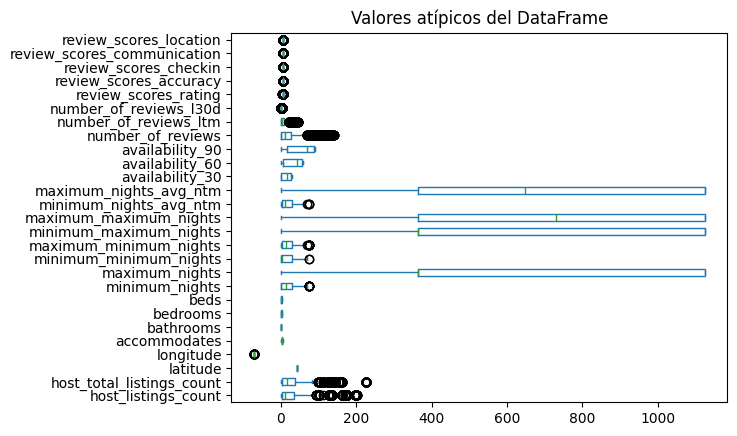

In [73]:
fig = plt.figure(figsize=(15,8))
df_Pais_limpio.plot(kind='box', vert=False)
plt.title('Valores atípicos del DataFrame')
plt.show()

<Figure size 1500x800 with 0 Axes>

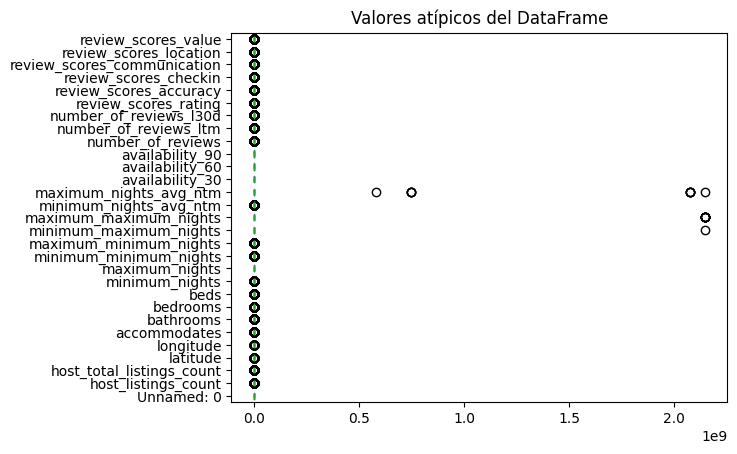

In [74]:
fig = plt.figure(figsize=(15,8))
df_pais.plot(kind='box', vert=False)
plt.title('Valores atípicos del DataFrame')
plt.show()